<a href="https://www.kaggle.com/code/jarredpriester/my-first-cnn?scriptVersionId=97258544" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# My Very First CNN!
### Jarred Priester
### 6/01/22

1. Introduction
2. Downloading the data
3. Preprocessing the images
4. Model
5. Predictions
6. Conclusion

# 1. Introduction

This notebook is my very first CNN! It is also my code and submission for the MNIST computer vision competion on Kaggle. This notebook will consist of four main parts, downloading the data, processing the data, creating our model, making our test predictions. Afterwards please feel free to add any tips that I could use for future computer vision projects. Here is the competition description from the competition's page:


***Competition Description***

*MNIST ("Modified National Institute of Standards and Technology") is the de facto “hello world” dataset of computer vision. Since its release in 1999, this classic dataset of handwritten images has served as the basis for benchmarking classification algorithms. As new machine learning techniques emerge, MNIST remains a reliable resource for researchers and learners alike.*

*In this competition, your goal is to correctly identify digits from a dataset of tens of thousands of handwritten images. We’ve curated a set of tutorial-style kernels which cover everything from regression to neural networks. We encourage you to experiment with different algorithms to learn first-hand what works well and how techniques compare.*


# 2. Downloading the data 

In [1]:
#importing libaries
import numpy as np 
import pandas as pd
import random as rd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


In [2]:
#downloading the sample submission
sample_sub = pd.read_csv("../input/digit-recognizer/sample_submission.csv")
sample_sub.head()

,ImageId,Label
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0


In [3]:
#downloading the training data
train = pd.read_csv("../input/digit-recognizer/train.csv")
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
#downloading the test data
test = pd.read_csv("../input/digit-recognizer/test.csv")
test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# 3. Preprocessing the images

First let us check if there are any missing values.

In [5]:
train.isnull().sum().any()

False

In [6]:
test.isnull().sum().any()

False

Looks like we have no missing values

In the training data set we can see that the first column is 'label' and the rest are pixels. We will use the label column as our Y and the rest as our X

In [7]:
Y_train = train["label"]

X_train = train.drop(labels = ["label"],axis = 1) 

Let us see how the labels are distrubuted:

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='label', ylabel='count'>

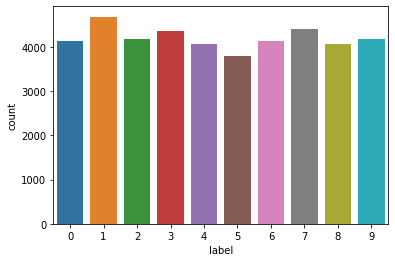

In [8]:
sns.countplot(Y_train)

The distrubution looks fairly balanced.

Next we need to scale the data from 0-255 to 0-1. This will make things easier to work with the neural network because it will allow the nn to converge faster.

In [9]:
X_train = X_train / 255.0
test = test / 255.0

The images will need to be reshaped in order feed into our model. Our images will be 28x28 and since we will be using grayscale the color channel will be 1. 

In [10]:
X_train = X_train.values.reshape(-1,28,28,1)
test = test.values.reshape(-1,28,28,1)

In [11]:
print(X_train.shape)
print(test.shape)

(42000, 28, 28, 1)
(28000, 28, 28, 1)


Now that the data has been scaled and reshaped we can now split our training data into training and validation sets. The split will be 90% to train on and 10% to use as validation. Which leaves us with the test data which will we be making our predictions on.

In [12]:
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size = 0.1, random_state=5)

In [13]:
print(X_train.shape)
print(Y_train.shape)
print(X_val.shape)
print(Y_val.shape)

(37800, 28, 28, 1)
(37800,)
(4200, 28, 28, 1)
(4200,)


Let us take a look at an image from the training set so we have a visual of the images we are working with

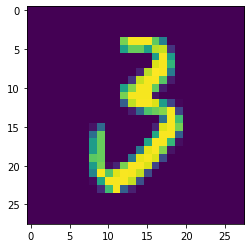

In [14]:
plt.imshow(X_train[5])

# 4. Model

In [15]:
#setting a random seed
tf.random.set_seed(75)

In [16]:
model = keras.Sequential([

    layers.Conv2D(filters=32, kernel_size=(5,5), activation="relu", padding='same',
                  input_shape=[28, 28, 1]),
    layers.MaxPool2D(),
    
    layers.Conv2D(filters=64, kernel_size=(3,3), activation="relu", padding='same'),
    layers.MaxPool2D(),
    
    layers.Conv2D(filters=128, kernel_size=(3,3), activation="relu", padding='same'),
    layers.MaxPool2D(),
    
    layers.Conv2D(filters=128, kernel_size=(3,3), activation="relu", padding='same'),
    layers.MaxPool2D(),
    
    layers.Flatten(),
    layers.Dense(units=256, activation="relu"),
    layers.Dense(units=10, activation="softmax"),
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        832       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 128)         73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 3, 3, 128)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 128)         1

2022-06-02 03:58:30.631625: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [17]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(epsilon=0.01),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [18]:
history = model.fit(
    x = X_train,
    y = Y_train, 
    validation_data= (X_val,Y_val),
    batch_size = 128,
    epochs=30,
    verbose=2,
)

2022-06-02 03:58:31.185276: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/30
296/296 - 26s - loss: 1.6121 - accuracy: 0.5628 - val_loss: 0.4393 - val_accuracy: 0.8621
Epoch 2/30
296/296 - 24s - loss: 0.2464 - accuracy: 0.9230 - val_loss: 0.1793 - val_accuracy: 0.9414
Epoch 3/30
296/296 - 25s - loss: 0.1315 - accuracy: 0.9606 - val_loss: 0.1090 - val_accuracy: 0.9657
Epoch 4/30
296/296 - 25s - loss: 0.0947 - accuracy: 0.9710 - val_loss: 0.1002 - val_accuracy: 0.9679
Epoch 5/30
296/296 - 26s - loss: 0.0703 - accuracy: 0.9781 - val_loss: 0.0619 - val_accuracy: 0.9800
Epoch 6/30
296/296 - 25s - loss: 0.0599 - accuracy: 0.9817 - val_loss: 0.0667 - val_accuracy: 0.9779
Epoch 7/30
296/296 - 26s - loss: 0.0536 - accuracy: 0.9835 - val_loss: 0.0637 - val_accuracy: 0.9810
Epoch 8/30
296/296 - 26s - loss: 0.0431 - accuracy: 0.9869 - val_loss: 0.0614 - val_accuracy: 0.9805
Epoch 9/30
296/296 - 25s - loss: 0.0380 - accuracy: 0.9879 - val_loss: 0.0505 - val_accuracy: 0.9831
Epoch 10/30
296/296 - 25s - loss: 0.0349 - accuracy: 0.9886 - val_loss: 0.0471 - val_accura

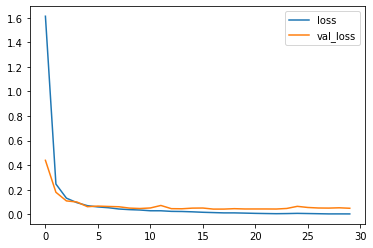

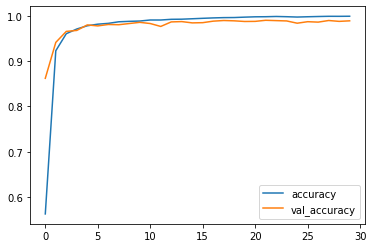

In [19]:
history_frame = pd.DataFrame(history.history)
history_frame.loc[:, ['loss', 'val_loss']].plot()
history_frame.loc[:, ['accuracy', 'val_accuracy']].plot();

# 5. Predictions

In [20]:
predictions = model.predict(test)

predictions = np.argmax(predictions,axis = 1)

submissions=pd.DataFrame({"ImageId": list(range(1,len(predictions)+1)),
                         "Label": predictions})
submissions.to_csv("submissions.csv", index=False, header=True)

submissions.head(20)

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3
5,6,7
6,7,0
7,8,3
8,9,0
9,10,3


# 6. Conclusion

Our model was relatively simple but it seems to be effective. We were able to get a training accuracy of .99 and a validation accuracy of .98. In future work we could add some drop out layers to try to improve that validation accuracy. Overall I think this is a good start to understanding computer vision. Next step will be to apply this technique to more complex classification problems.